In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
training_records = pd.read_csv('dengue_features_train.csv')
testing_records = pd.read_csv('dengue_features_test.csv')

In [3]:
training_records.groupby('city').mean()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,
iq,2005.000000,26.503846,0.263869,0.238783,0.250126,0.266779,64.245736,297.869538,299.133043,295.492982,...,57.609864,88.639117,64.245736,17.096110,9.206783,27.530933,10.566197,34.004545,21.196680,62.467262
sj,1998.826923,26.503205,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,...,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484


In [4]:
testing_records.groupby('city').mean()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,
iq,2011.500000,26.333333,0.266889,0.270574,0.258583,0.282235,57.924615,297.760238,299.039011,295.579890,...,72.609936,89.606016,57.924615,17.214368,9.321245,27.541088,10.741861,33.961935,21.089262,34.389542
sj,2010.326923,26.503846,0.024801,0.036730,0.177055,0.153226,26.521124,299.458051,299.542968,295.322004,...,23.766279,78.203034,26.521124,16.753383,2.587043,27.272536,6.152436,31.677132,23.107364,34.212791


In [5]:
training_records_sj = training_records[training_records['city'] == 'sj'].drop('city', 1)
training_records_iq = training_records[training_records['city'] == 'iq'].drop('city', 1)
testing_records_sj = testing_records[testing_records['city'] == 'sj'].drop('city', 1)
testing_records_iq = testing_records[testing_records['city'] == 'iq'].drop('city', 1)

In [6]:
records_iq = pd.concat([training_records_iq, testing_records_iq], ignore_index=True)
records_sj = pd.concat([training_records_sj, testing_records_sj], ignore_index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb99bac7908>,
      dtype=object)

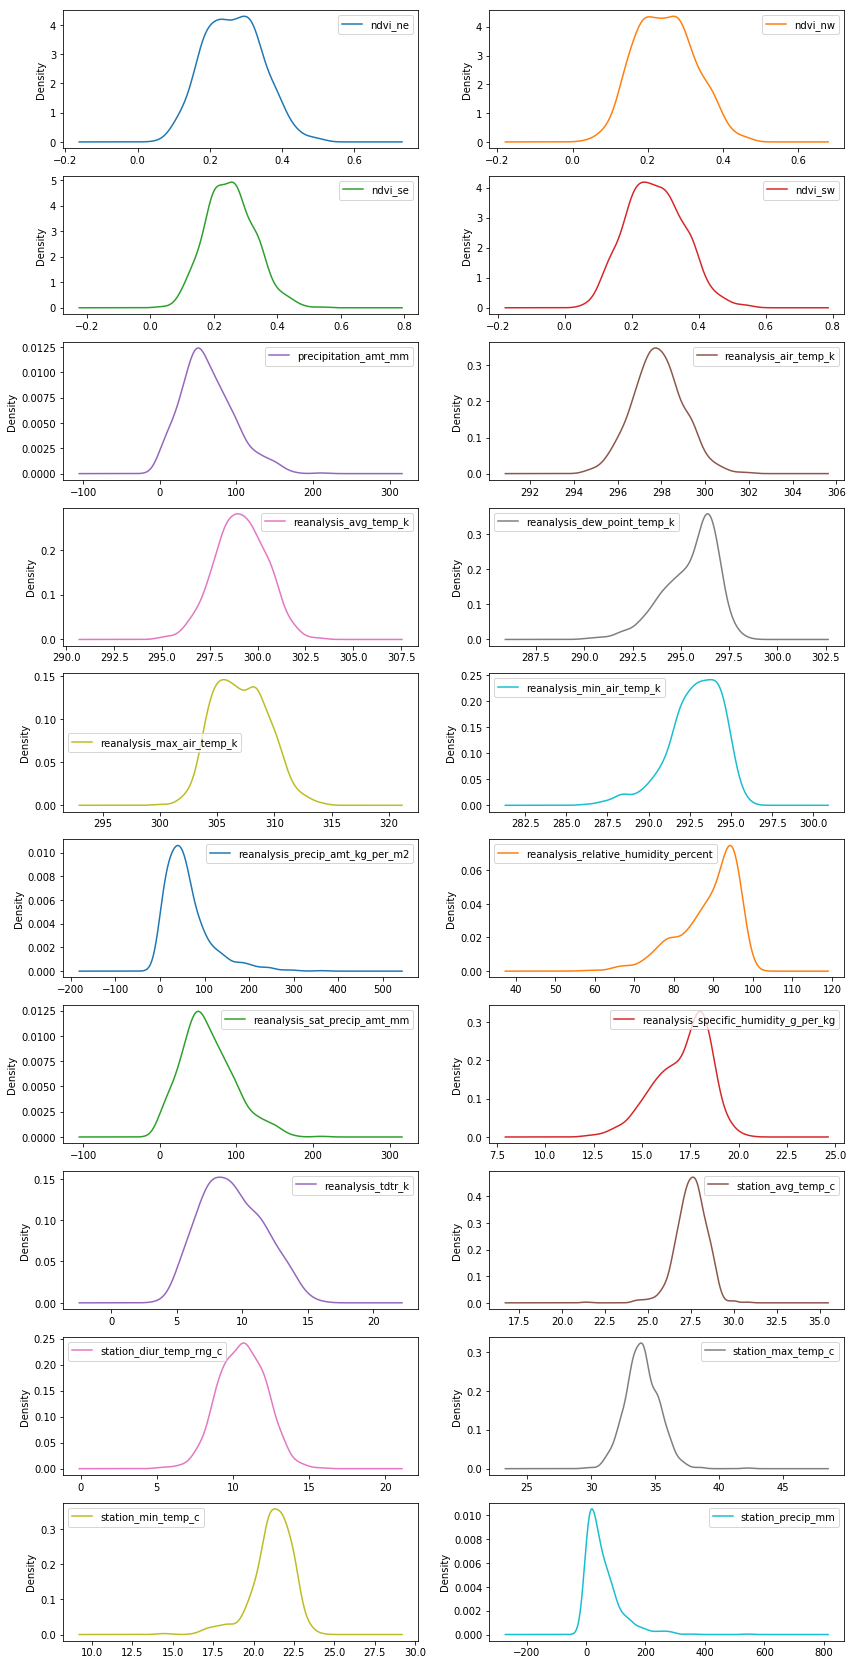

In [7]:
(records_iq.drop(['year', 'weekofyear'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(14, 30), layout=(10, 2), sharex=False))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb99bab4fd0>,
      dtype=object)

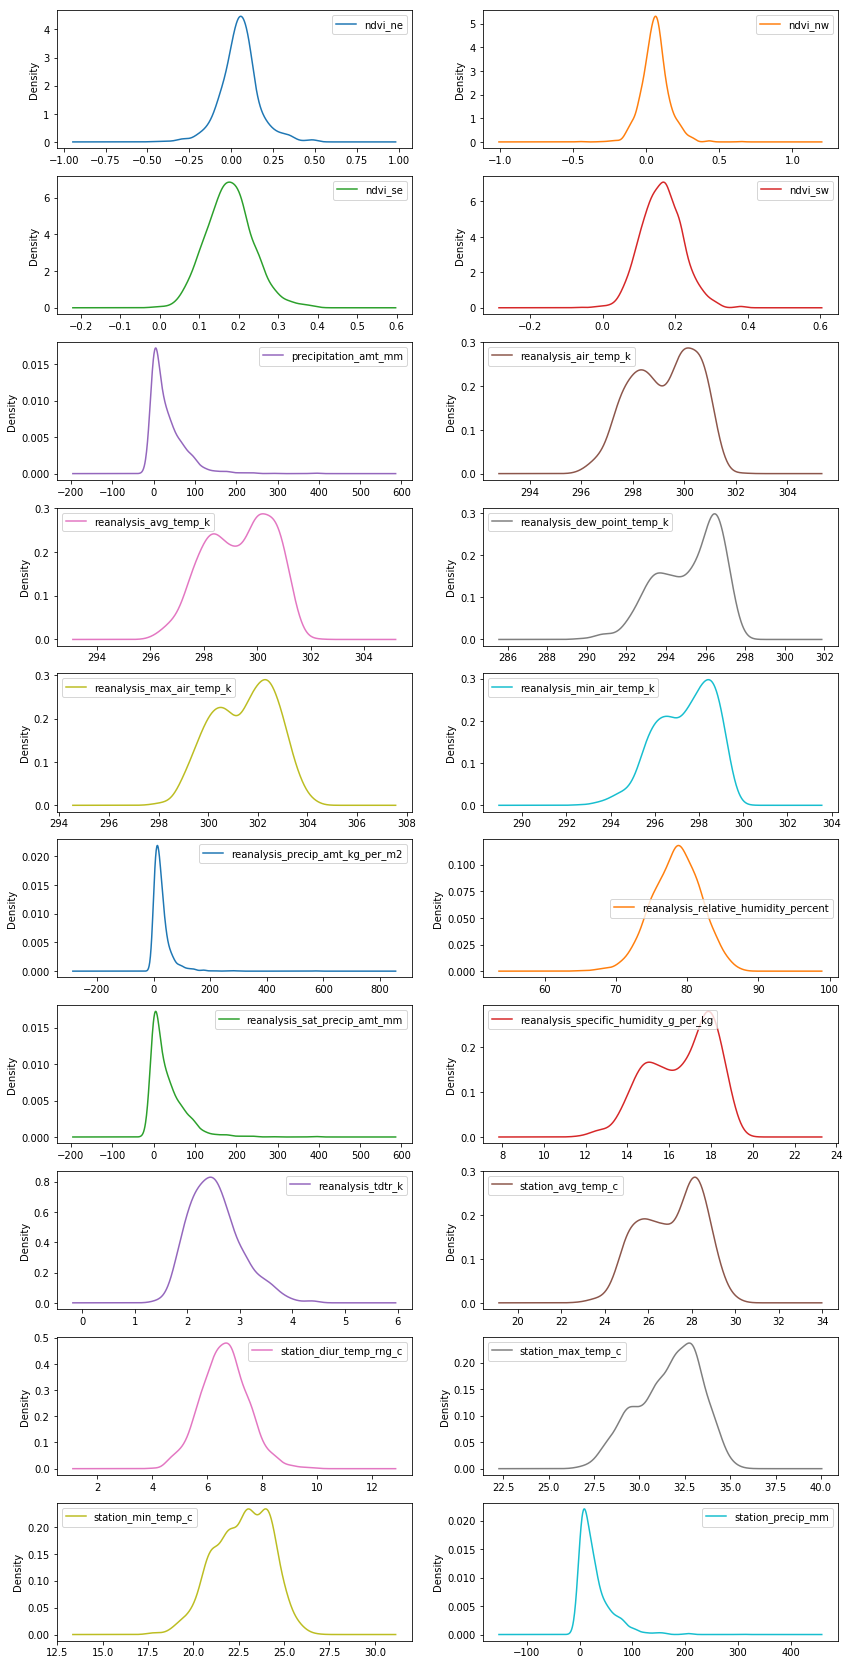

In [8]:
(records_sj.drop(['year', 'weekofyear'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(14, 30), layout=(10, 2), sharex=False))

In [9]:
corr_iq = records_iq.corr()
corr_sj = records_sj.corr()

Text(0.5, 1.0, 'Iquitos correlations')

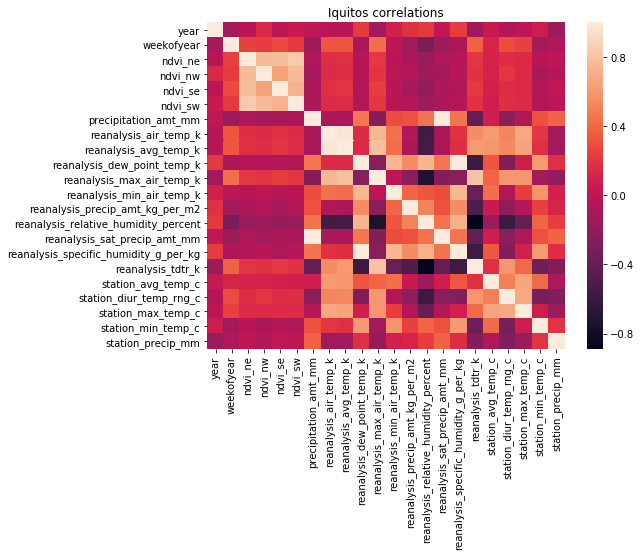

In [10]:
plt.figure(figsize=(8, 6))
corr_heatmap_iq = sns.heatmap(corr_iq)
plt.title('Iquitos correlations')

Text(0.5, 1.0, 'San Juan correlations')

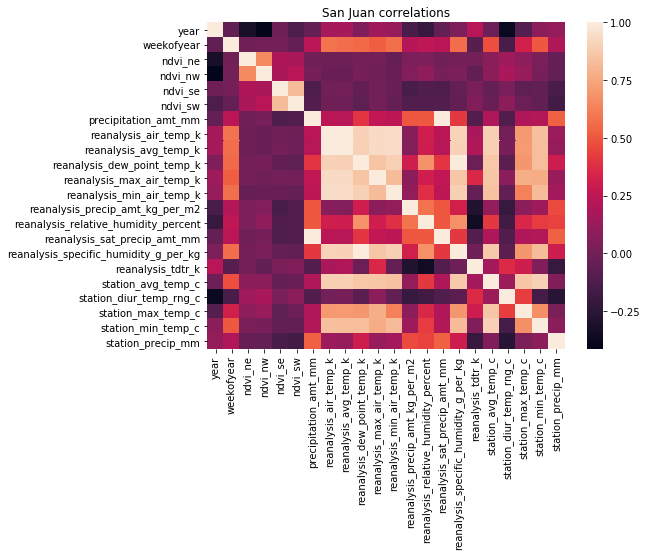

In [11]:
plt.figure(figsize=(8, 6))
corr_heatmap_sj = sns.heatmap(corr_sj)
plt.title('San Juan correlations')

In [12]:

corr_upper_iq = corr_iq.where(np.triu(np.ones(corr_iq.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop_iq = [column for column in corr_upper_iq.columns if any(corr_upper_iq[column] > 0.95) or any(corr_upper_iq[column] < -0.95)]
to_drop_iq

['reanalysis_avg_temp_k',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg']

In [13]:
corr_upper_sj = corr_sj.where(np.triu(np.ones(corr_sj.shape), k=1).astype(np.bool))
to_drop_sj = [column for column in corr_upper_sj.columns if any(corr_upper_sj[column] > 0.95) or any(corr_upper_iq[column] < -0.95)]
to_drop_sj

['reanalysis_avg_temp_k',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg']

In [14]:
records_iq.drop(to_drop_iq, axis=1, inplace=True)
records_sj.drop(to_drop_sj, axis=1, inplace=True)

In [15]:
records_iq.drop(['year'], axis=1, inplace=True)
records_sj.drop(['year'], axis=1, inplace=True)

In [16]:
records_iq[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']] -= 273.15
records_sj[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']] -= 273.15

<Figure size 432x288 with 0 Axes>

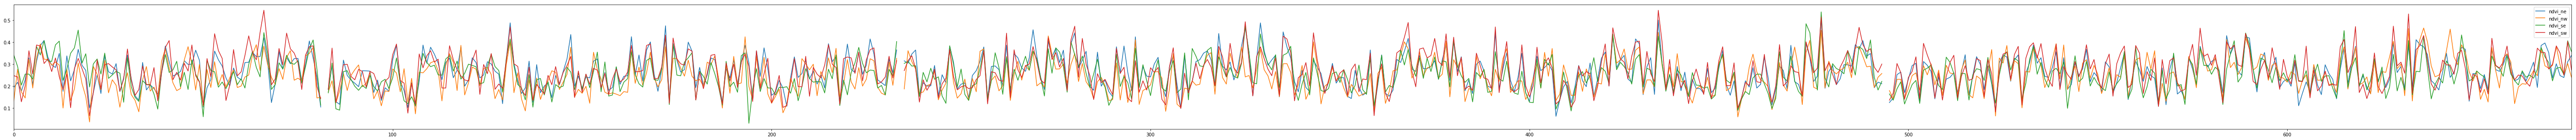

In [17]:
plt.figure()
records_iq[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(figsize=(100, 5))

In [18]:
records_iq['ndvi'] = records_iq[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)
records_iq.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

<Figure size 432x288 with 0 Axes>

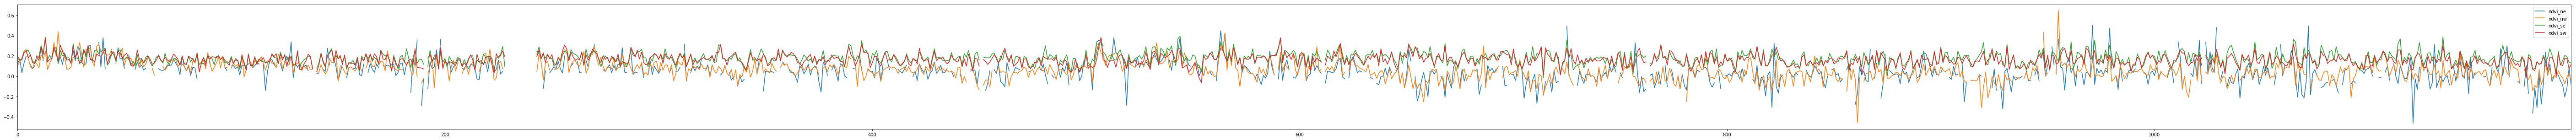

In [19]:
plt.figure()
records_sj[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(figsize=(100, 5))

In [20]:
records_sj['ndvi_n'] = records_sj[['ndvi_ne', 'ndvi_nw']].mean(axis=1)
records_sj['ndvi_s'] = records_sj[['ndvi_se', 'ndvi_sw']].mean(axis=1)
records_sj.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

In [21]:
records_sj['reanalysis_temp'] = records_sj[
    ['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 
     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']].mean(axis=1)
records_sj.drop(['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 
     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'], axis=1, inplace=True)

<Figure size 432x288 with 0 Axes>

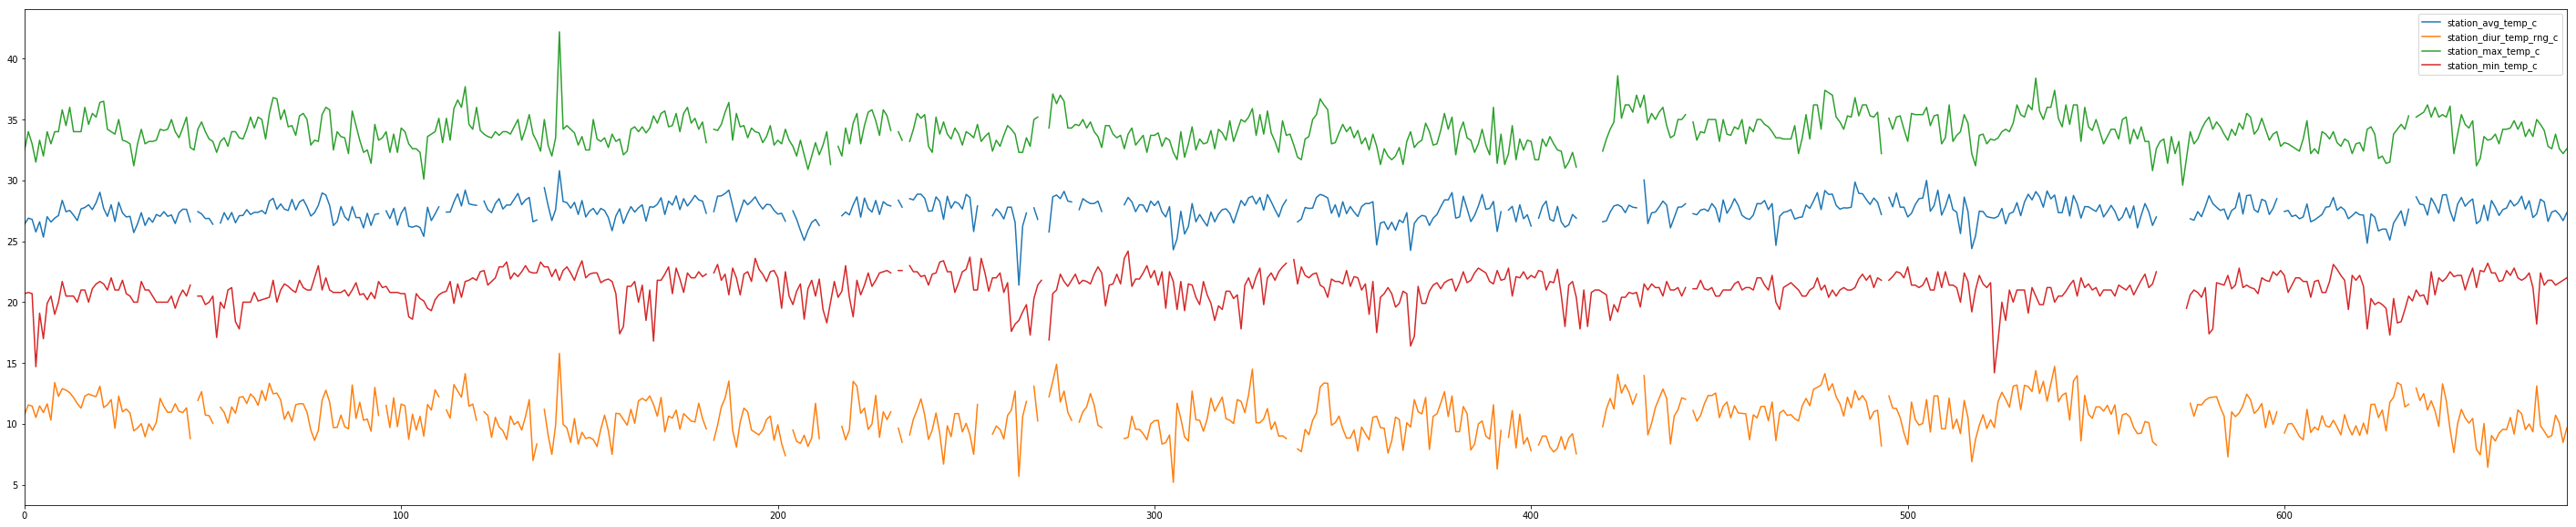

In [22]:
plt.figure()
records_iq[['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c']].plot(figsize=(50, 10))

In [23]:
records_iq['station_temp'] = records_iq[
    ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']
].interpolate().mean(axis=1)
records_iq.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c'], axis=1, inplace=True)

In [24]:
records_sj['station_temp'] = records_sj[
    ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']
].interpolate().mean(axis=1)
records_sj.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c'], axis=1, inplace=True)

In [25]:
records_iq.to_csv('1-features-iq.csv', index=False)
records_sj.to_csv('1-features-sj.csv', index=False)

In [26]:
training_targets = pd.read_csv('dengue_labels_train.csv')

In [27]:
training_targets.drop(['year'], axis=1, inplace=True)

In [28]:
training_targets['week_start_date'] = training_records['week_start_date']

In [29]:
training_targets_sj = training_targets[training_targets['city'] == 'sj'].drop('city', 1)
training_targets_iq = training_targets[training_targets['city'] == 'iq'].drop('city', 1)

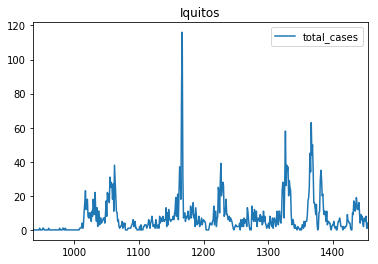

In [30]:
training_targets_iq.drop(['weekofyear'], axis=1).plot(title="Iquitos")

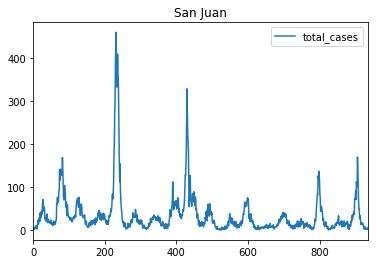

In [31]:
training_targets_sj.drop(['weekofyear'], axis=1).plot(title="San Juan")

In [32]:
training_targets_iq.to_csv('1-labels-train-iq.csv', index=False)
training_targets_sj.to_csv('1-labels-train-sj.csv', index=False)

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from rpy2.robjects import r

from IPython.display import display, HTML
%matplotlib inline

ModuleNotFoundError: No module named 'rpy2'

In [34]:
records_iq = pd.read_csv(
    '1-features-iq.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')
records_sj = pd.read_csv(
    '1-features-sj.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')

In [35]:
records_iq_i1 = records_iq.interpolate().drop(['weekofyear'], axis=1)
records_sj_i1 = records_sj.interpolate().drop(['weekofyear'], axis=1)

In [36]:
records_iq_i1 = records_iq_i1.rolling(5).mean().bfill()
records_sj_i1 = records_sj_i1.rolling(5).mean().bfill()

In [37]:
def stl_decompose(df, column, freq=52):
    dfd = pd.DataFrame(index=df.index)
    series = list(df[column].values)
    length = len(series)
    rts = r.ts(series, frequency=freq)
    decomposed = list(r.stl(rts, 'periodic', robust=True).rx2('time.series'))
    dfd['trend'] = decomposed[length:2*length]
    dfd['seasonal'] = decomposed[0:length]
    dfd['residuals'] = decomposed[2*length:3*length]
    
    return dfd

In [38]:
def stl_multi_decompose(df):
    trend = pd.DataFrame(index=df.index)
    seasonal = pd.DataFrame(index=df.index)
    residuals = pd.DataFrame(index=df.index)
    
    for col in df.columns:
        dfd = stl_decompose(df, col)
        trend[col] = dfd['trend']
        seasonal[col] = dfd['seasonal']
        residuals[col] = dfd['residuals']
    
    display(HTML(pd.DataFrame({
        'trend_mean': trend.mean(), 'seasonal_mean': seasonal.mean(), 'residuals_mean': residuals.mean(), 
        'trend_std': trend.std(), 'seasonal_std': seasonal.std(), 'residuals_std': residuals.std()
    }).to_html()))
    return {'trend': trend, 'seasonal': seasonal, 'residuals': residuals}

In [39]:
def correlation_heatmap_drop(df, title, f):
    corr = df.corr()
    plt.figure(figsize=(8, 6))
    corr_hm = sns.heatmap(corr)
    plt.title(title)
    
    corr_upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in corr_upper.columns 
               if any(corr_upper[column] > f) or any(corr_upper[column] < -f)]
    return to_drop

In [40]:
def drop_extreme_correlated(dec_df, f=0.95):
    for k, v in dec_df.items():
        to_drop = correlation_heatmap_drop(v, 'Iquitos' + k, f)
        print('Dropping ' + str(to_drop) + ' in ' + k)
        v.drop(to_drop, axis=1, inplace=True)

In [41]:
dec_iq = stl_multi_decompose(records_iq_i1)

NameError: name 'r' is not defined

In [42]:
drop_extreme_correlated(dec_iq)

NameError: name 'dec_iq' is not defined

In [43]:
dec_sj = stl_multi_decompose(records_sj_i1)

NameError: name 'r' is not defined

In [44]:
drop_extreme_correlated(dec_sj)

NameError: name 'dec_sj' is not defined

In [45]:
stl_dec_iq = pd.concat(map(lambda kvp: kvp[1].add_prefix(kvp[0] + '_'), dec_iq.items()), axis=1)
stl_dec_sj = pd.concat(map(lambda kvp: kvp[1].add_prefix(kvp[0] + '_'), dec_sj.items()), axis=1)

NameError: name 'dec_iq' is not defined

In [46]:
stl_dec_iq.to_csv('2-time-dec-features-iq.csv', index_label='week_start_date')
stl_dec_sj.to_csv('2-time-dec-features-sj.csv', index_label='week_start_date')

NameError: name 'stl_dec_iq' is not defined

In [47]:
training_targets_iq = pd.read_csv(
    '1-labels-train-iq.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')
training_targets_sj = pd.read_csv(
    '1-labels-train-sj.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')

In [48]:
# int not supported - float only
training_targets_iq['total_cases'] += 0.0
training_targets_sj['total_cases'] += 0.0

In [105]:
dec_targets_iq = stl_decompose(training_targets_iq, 'total_cases')
dec_targets_sj = stl_decompose(training_targets_sj, 'total_cases')

NameError: name 'r' is not defined

In [106]:
dec_targets_iq.to_csv('1-labels-iq.csv')
dec_targets_sj.to_csv('1-labels-sj.csv')

NameError: name 'dec_targets_iq' is not defined

In [49]:
version=9

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [52]:
records_iq = pd.read_csv(
    '1-features-iq.csv', 
    parse_dates=['week_start_date'],
    index_col='week_start_date'
).interpolate()
records_sj = pd.read_csv(
    '1-features-sj.csv', 
    parse_dates=['week_start_date'],
    index_col='week_start_date'
).interpolate()

In [53]:
labels_iq = pd.read_csv(
    '1-labels-train-iq.csv',
    parse_dates=['week_start_date'],
    index_col='week_start_date'
)
labels_sj = pd.read_csv(
    '1-labels-train-sj.csv',
    parse_dates=['week_start_date'],
    index_col='week_start_date'
)

In [54]:
def predict_for(records, labels, ntrain, lencycle, features=['station_temp']):
    lr_seasonal = LinearRegression()
    weeks = pd.get_dummies(records['weekofyear'], prefix='w')
    train_weeks = weeks[:ntrain].reset_index().drop('week_start_date', axis=1)
    test_weeks = weeks[ntrain:].reset_index().drop('week_start_date', axis=1)
    train_cases = labels[['total_cases']].reset_index().drop('week_start_date', axis=1)

    lr_seasonal.fit(train_weeks, train_cases)
    seasonal = pd.Series(
        lr_seasonal.predict(train_weeks).flatten()).rolling(5, min_periods=1, center=True).mean()
    remainder = train_cases.total_cases - seasonal

    trend = records[features].reset_index().drop('week_start_date', axis=1).rolling(lencycle).mean()
    train_trend = trend[lencycle:ntrain]
    test_trend = trend[ntrain:]
    train_remainder = remainder[lencycle:]

    lr_trend = LinearRegression()
    lr_trend.fit(train_trend, train_remainder)
    
    train_pred_trend = pd.Series(lr_trend.predict(train_trend).flatten())
    print('mae: ' + str(mean_absolute_error(y_pred=train_pred_trend.values + seasonal[lencycle:].values,
                    y_true=train_cases['total_cases'][lencycle:].values)))

    pred_seasonal = pd.Series(lr_seasonal.predict(test_weeks).flatten())
    pred_trend = pd.Series(lr_trend.predict(test_trend).flatten())

    pred = (pred_trend + pred_seasonal).rolling(5, min_periods=1, center=True).mean()

    return pred

In [55]:
# pred_iq = predict_for(records_iq, labels_iq, 520, 52, ['precipitation_amt_mm', 'reanalysis_air_temp_k',
#        'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
#        'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
#        'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
#        'station_precip_mm', 'ndvi', 'station_temp'])
# pred_sj = predict_for(records_sj, labels_sj, 936, 52, ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2',
#        'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
#        'station_precip_mm', 'ndvi_n', 'ndvi_s', 'reanalysis_temp',
#        'station_temp'])

pred_iq = predict_for(records_iq, labels_iq, 520, 53, [
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent', 
    'station_temp']).round().clip_lower(0).astype(int)
pred_sj = predict_for(records_sj, labels_sj, 936, 53, [
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent',
    'station_temp']).round().clip_lower(0).astype(int)

mae: 6.223900608183446
mae: 25.225597165363318


/home/nikhil97/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  
/home/nikhil97/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead


In [ ]:
pred = pd.concat([pred_sj, pred_iq], ignore_index=True).round().clip_lower(0).astype(int)


In [ ]:
pred.to_csv('prediction' + str(version) + '.csv', index=False)

In [43]:
pred=np.concatenate([pred_sj, pred_iq])

In [56]:
submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([pred_sj, pred_iq])
#submission.to_csv("Values.csv")

In [57]:
mean = submission['total_cases'].mean(skipna=True)


print (submission)

30.646634615384617
                      total_cases
city year weekofyear             
sj   2008 18                    0
          19                    0
          20                    0
          21                    0
          22                    0
          23                    0
          24                    0
          25                    0
          26                    0
          27                    1
          28                    4
          29                    7
          30                   13
          31                   18
          32                   23
          33                   28
          34                   33
          35                   35
          36                   37
          37                   40
          38                   43
          39                   46
          40                   46
          41                   47
          42                   47
          43                   46
          44                 

In [58]:
#submission.iloc[:10]=0
submission.iloc[:9]=8
submission.iloc[:8]=9
submission.iloc[:7]=7
submission.iloc[:6]=7
submission.iloc[:5]=6
submission.iloc[:4]=8
submission.iloc[:3]=8
submission.iloc[:2]=7
submission.iloc[:1]=6

In [59]:
submission

total_cases
city year weekofyear             
sj   2008 18                    6
          19                    7
          20                    8
          21                    8
          22                    6
          23                    7
          24                    7
          25                    9
          26                    8
          27                    1
          28                    4
          29                    7
          30                   13
          31                   18
          32                   23
          33                   28
          34                   33
          35                   35
          36                   37
          37                   40
          38                   43
          39                   46
          40                   46
          41                   47
          42                   47
          43                   46
          44                   44
          45                   43
          46                   42
          47                   38
...                           ...
iq   2012 48                   16
          49                   16
          50                   15
          51                   17
     2013 1                    16
          2                    16
          3                    16
          4                    17
          5                    16
          6                    16
          7                    15
          8                    14
          9                    12
          10                   11
          11                   10
          12                    9
          13                    8
          14                    8
          15                    7
          16                    7
          17                    7
          18                    7
          19                    6
          20                    6
          21                    6
          22                    5
          23                    5
          24                    5
          25                    4
          26                    4

[416 rows x 1 columns]

In [60]:
submission.to_csv("Values.csv")